In [1]:
%cd H:\GitHub\pytracer\

H:\GitHub\pytracer


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scripts.utils import nice_double_plot
from scripts.assemblies import shielded_assembly
import pytracer.geometry as geo
import pytracer.transmission as transmission
import pytracer.fission as fission
import pytracer.neutron_chain as chain

In [ ]:
assembly_solids = shielded_assembly()
assembly_flat = geo.flatten(assembly_solids)

# Transmission

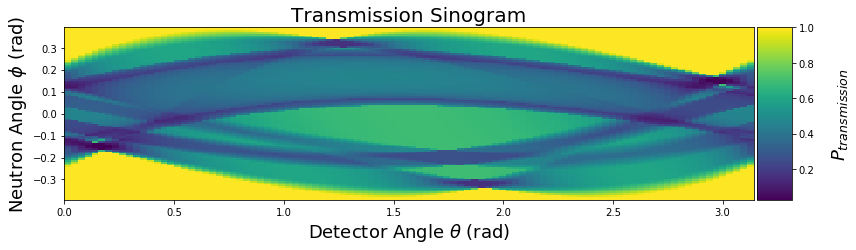

In [3]:
def display_transmission_sinogram():
    radians = np.linspace(0, np.pi, 100)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 100)
    source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)

    measurement = transmission.scan(assembly_flat, source, detector_points)

    plt.figure(figsize=(9, 6))
    ax = plt.gca()
    im = ax.imshow(np.exp(-measurement), interpolation='none', extent=extent, cmap='viridis')
    plt.title('Transmission Sinogram', size=20)
    plt.xlabel(r'Detector Angle $\theta$ (rad)', size=18)
    plt.ylabel(r'Neutron Angle $\phi$ (rad)', size=18)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    cb.set_label(r'$P_{transmission}$', size=18, labelpad=15)

    plt.tight_layout()

    plt.show()

display_transmission_sinogram()

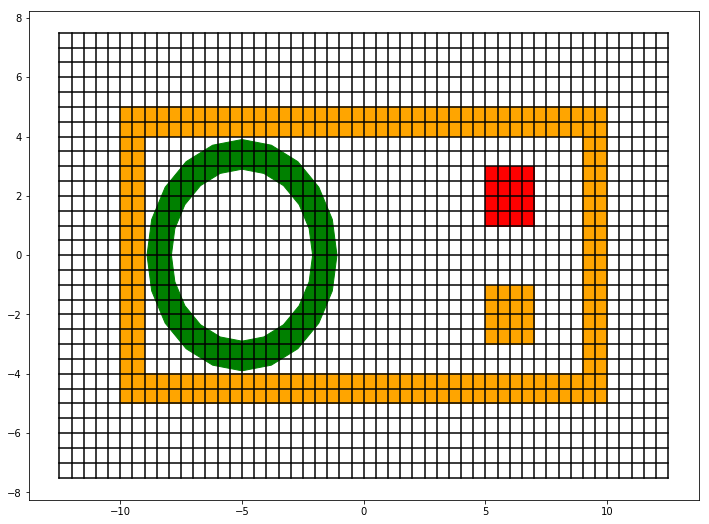

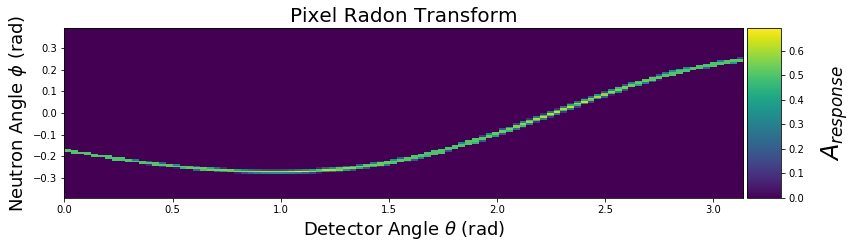

In [4]:
def display_pixel_transmission_response_sinogram():
    plt.figure()
    geo.draw(assembly_solids)

    grid = geo.Grid(width=25, height=15, num_x=50, num_y=30)
    grid.draw()

    radians = np.linspace(0, np.pi, 100)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 100)
    source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)

    # discretized transmission response
    response = transmission.grid_response(assembly_flat, grid, source, detector_points)

    cell_response = response[int(520 / 4 + 5)]
    plt.figure(figsize=(9, 6))
    ax = plt.gca()
    im = ax.imshow(cell_response, interpolation='none', extent=extent, cmap='viridis')
    plt.title('Pixel Radon Transform', size=20)
    plt.xlabel(r'Detector Angle $\theta$ (rad)', size=18)
    plt.ylabel(r'Neutron Angle $\phi$ (rad)', size=18)
    # cb = plt.colorbar(im, fraction=0.046, pad=0.04)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    cb.set_label(r'$A_{response}$', size=24, labelpad=15)

    plt.tight_layout()

    plt.show()
    
display_pixel_transmission_response_sinogram()

# Fission

10000


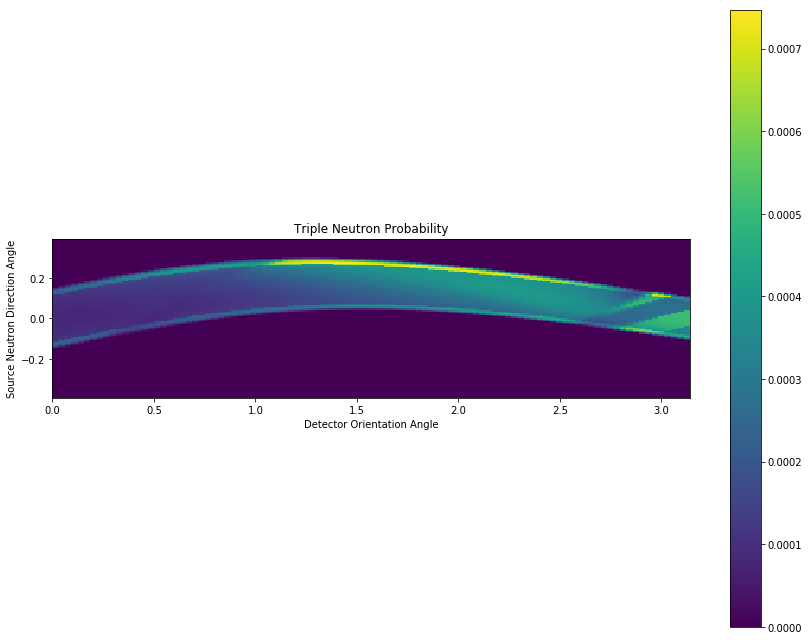

In [5]:
def display_fission_sinogram():
    p_range = np.linspace(0, 0.2, 10 + 1)
    p_matrix, p_range = chain.generate_p_matrix(chain.nu_pu239_induced, 'pu239', max_n=20, p_range=p_range)

    radians = np.linspace(0, np.pi, 100)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 100)
    source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)
    source = source[0, :, :]

#     plt.xlabel('X (cm)', size=18)
#     plt.ylabel('Y (cm)', size=18)
#     ax = plt.gca()
#     ax.set_aspect('equal')

    # single_probs1 = fission.scan(source, detector_points, detector_points, assembly_flat, 1, p_matrix, p_range)
    # single_probs2 = fission.scan(source, detector_points, detector_points, assembly_flat, 1, nu_dist2)

    double_probs1 = fission.scan(source, detector_points, detector_points, assembly_flat, 3, p_matrix, p_range)
    # double_probs2 = fission.scan(source, detector_points, detector_points, assembly_flat, 2, nu_dist2)

    # maxval = max([single_probs1.max(), double_probs1.max()])
    maxval = max([double_probs1.max()])

    # nice_double_plot(single_probs1.T, single_probs2.T, extent, 'Single Neutron Probability 1',
    #                  'Single Neutron Probability 2', 'Detector Orientation Angle', 'Source Neutron Direction Angle',
    #                  True, 0, maxval)
    #
    # nice_double_plot(double_probs1.T, double_probs2.T, extent, 'Double Neutron Probability 1',
    #                  'Double Neutron Probability 2', 'Detector Orientation Angle', 'Source Neutron Direction Angle',
    #                  True, 0, maxval)


    # plt.figure(figsize=(8, 2.5))
    # plt.imshow(single_probs1.T, interpolation='none', extent=extent)
    # plt.title('Single Neutron Probability')
    # plt.xlabel('Detector Orientation Angle')
    # plt.ylabel('Source Neutron Direction Angle')
    # plt.colorbar()
    # plt.tight_layout()

    plt.figure()
    plt.imshow(double_probs1.T, interpolation='none', extent=extent)
    plt.title('Triple Neutron Probability')
    plt.xlabel('Detector Orientation Angle')
    plt.ylabel('Source Neutron Direction Angle')
    plt.colorbar()
    plt.tight_layout()


    # nice_double_plot(single_probs1.T, double_probs1.T, extent, 'Single Neutron Probability 1',
    #                  'Double Neutron Probability 1', 'Detector Orientation Angle', 'Source Neutron Direction Angle',
    #                  True, 0, maxval)

    # nice_double_plot(single_probs2.T, double_probs2.T, extent, 'Single Neutron Probability 2',
    #                  'Double Neutron Probability 2', 'Detector Orientation Angle', 'Source Neutron Direction Angle',
    #                  True, 0, maxval)

    plt.show()

display_fission_sinogram()

0.0 0.0145569951355


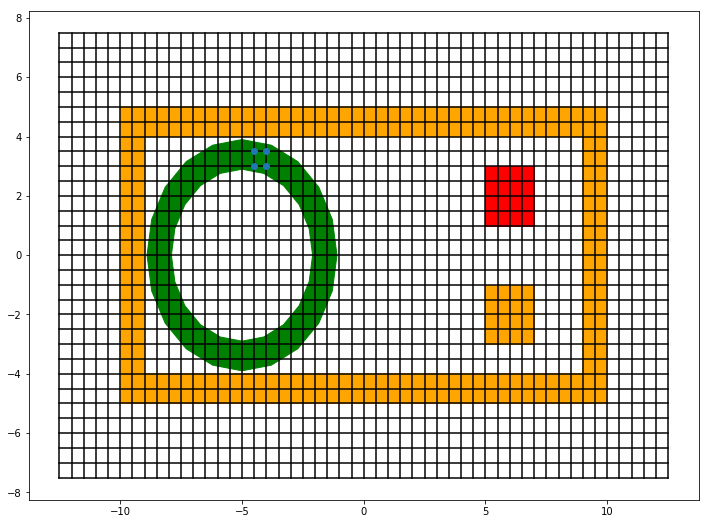

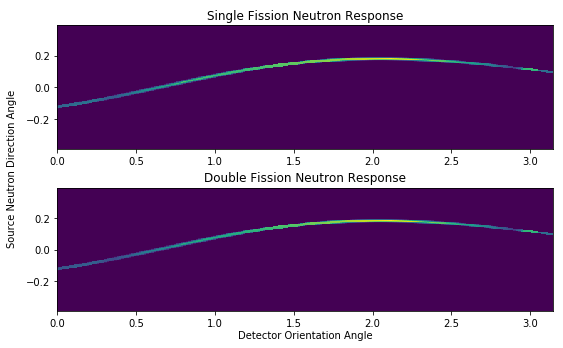

In [6]:
def display_pixel_fission_response_sinogram():
    avg_nu = np.array([1.28795607e-03, 8.60279210e-01, 2.86381583e-02,
                       3.38214081e-02, 2.48722300e-02, 1.39170288e-02,
                       9.13814742e-03, 6.58515484e-03, 4.78758039e-03,
                       3.52881195e-03, 2.67774095e-03, 2.06178455e-03,
                       1.60510130e-03, 1.26381893e-03, 1.00437820e-03,
                       8.04334576e-04, 6.48533483e-04, 5.26065462e-04,
                       4.28982581e-04, 3.51465665e-04, 2.89177044e-04], dtype=np.double)
    avg_nu /= np.sum(avg_nu)

    plt.figure()
    geo.draw(assembly_solids)

    radians = np.linspace(0, np.pi, 200)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 200)
    source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)
    source = source[0, :, :]

    grid = geo.Grid(width=25, height=15, num_x=50, num_y=30)
    grid.draw()

    cell_i = 109 * 4 - 20
    unit_m = geo.Material('black', 1, 1, 0)
    vacuum = geo.Material('white', 0, 0, 0)
    grid_points = grid.cell(cell_i)
    cell_geom = [geo.Solid(geo.convert_points_to_segments(grid_points, circular=True), unit_m, vacuum)]
    cell_flat = geo.flatten(cell_geom)
    plt.scatter(grid_points[:, 0], grid_points[:, 1], zorder=12)

    single_response = fission.grid_response_scan(source, detector_points, detector_points, cell_flat, assembly_flat, 1,
                                                 avg_nu)
    double_response = fission.grid_response_scan(source, detector_points, detector_points, cell_flat, assembly_flat, 2,
                                                 avg_nu)

    nice_double_plot(single_response.T, double_response.T, extent, 'Single Fission Neutron Response',
                     'Double Fission Neutron Response',
                     'Detector Orientation Angle', 'Source Neutron Direction Angle')

    plt.show()
    
display_pixel_fission_response_sinogram()

# Forward Calculation

0.0 0.0603736101811
0.0 0.00674959532535


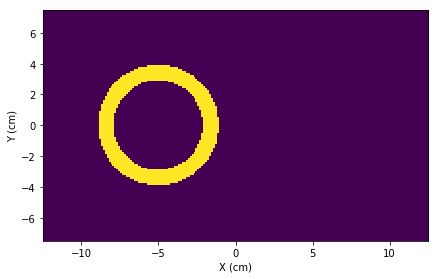

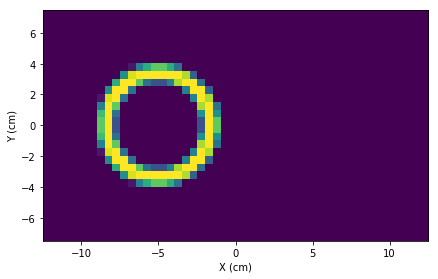

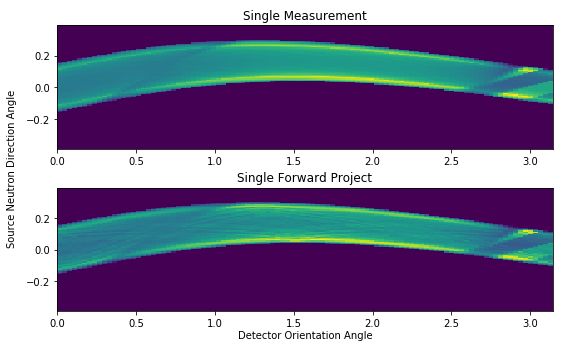

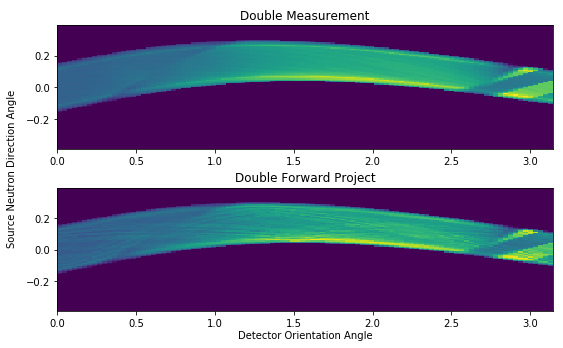

In [8]:
def rebin(a, shape):
    sh = shape[0], a.shape[0] // shape[0], shape[1], a.shape[1] // shape[1]
    return a.reshape(sh).mean(-1).mean(1)


def display_forward_fission_sinogram():
    radians = np.linspace(0, np.pi, 100)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 100)
    source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)
    source = source[0, :, :]

    grid = geo.Grid(width=25, height=15, num_x=50, num_y=30)

    cell_i = 109
    grid_points = grid.cell(cell_i)

    # super sample the fission attenuation image, to down sample it later
    supersample = 4
    min_gridx, max_gridx = grid.points[0, 0, 0], grid.points[0, -1, 0]
    min_gridy, max_gridy = grid.points[-1, 0, 1], grid.points[0, 0, 1]
    numx = supersample * (np.size(grid.points, 1) - 1) + 2
    numy = supersample * (np.size(grid.points, 0) - 1) + 2
    xs = np.linspace(min_gridx, max_gridx, numx)[1:-1]
    ys = np.linspace(min_gridy, max_gridy, numy)[1:-1]
    fissionimage = np.zeros((np.size(xs, 0), np.size(ys, 0)), dtype=np.double)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            fissionimage[i, j] = fission.fissionval_at_point(np.array([x, y]), assembly_flat)

    # down sample the image
    dims = (int(np.size(fissionimage, 0) / supersample), int(np.size(fissionimage, 1) / supersample))
    fissionimage_down = rebin(fissionimage, dims)

    plt.figure(figsize=(6, 4))
    plt.imshow(fissionimage.T, interpolation='none', extent=[-25. / 2, 25. / 2, -15. / 2, 15. / 2], cmap='viridis')
    plt.tight_layout()
    plt.xlabel('X (cm)')
    plt.ylabel('Y (cm)')

    plt.figure(figsize=(6, 4))
    plt.imshow(fissionimage_down.T, interpolation='none', extent=[-25. / 2, 25. / 2, -15. / 2, 15. / 2], cmap='viridis')
    plt.tight_layout()
    plt.xlabel('X (cm)')
    plt.ylabel('Y (cm)')

    response_single = np.load(r'scripts\data\fission_response_single.npy')
    response_double = np.load(r'scripts\data\fission_response_double.npy')

    single_probs = np.load(r'scripts\data\single_probs.npy')
    double_probs = np.load(r'scripts\data\double_probs.npy')


    def project_fission(fission_image, response):
        response_shape = response.shape
        rr = response.reshape(-1, np.size(response, 1) * np.size(response, 2))
        image = fission_image.T.flatten()
        projection = np.dot(image, rr).reshape(response_shape[1], response_shape[2])
        return projection


    single_project = project_fission(fissionimage_down, response_single)

    nice_double_plot(single_probs.T, single_project.T, extent, 'Single Measurement',
                     'Single Forward Project', 'Detector Orientation Angle', 'Source Neutron Direction Angle')

    double_project = project_fission(fissionimage_down, response_double)

    nice_double_plot(double_probs.T, double_project.T, extent, 'Double Measurement',
                     'Double Forward Project', 'Detector Orientation Angle', 'Source Neutron Direction Angle')

    plt.show()

display_forward_fission_sinogram()